In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [4]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
# we are going to normalize the columns to replace ' ' with '_' 
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [6]:
# grabbing the categorical columns
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
cat_cols

['lead_source', 'industry', 'employment_status', 'location']

In [7]:
# and for the values in cat columns, replace ' ' with '_'
for col in cat_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [9]:
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [10]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [11]:
df.converted.value_counts().mean()

np.float64(731.0)

In [12]:
df.converted.mean()

np.float64(0.6190150478796169)

In [14]:
df.converted.value_counts()/len(df)

converted
1    0.619015
0    0.380985
Name: count, dtype: float64

In [15]:
# grab numerical columns
num_cols = list(df.dtypes[df.dtypes != 'object'].index)
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [16]:
print(f"categorical columns: {cat_cols}")
print(f"numerical columns: {num_cols}")

categorical columns: ['lead_source', 'industry', 'employment_status', 'location']
numerical columns: ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']


In [17]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_courses_viewed,1462.0,2.031464,1.449717,0.0,1.0000,2.00,3.00,9.0
annual_income,1281.0,59886.273224,15070.140389,13929.0,49698.0000,60148.00,69639.00,109899.0
interaction_count,1462.0,2.976744,1.681564,0.0,2.0000,3.00,4.00,11.0
lead_score,1462.0,0.506108,0.288465,0.0,0.2625,0.51,0.75,1.0
converted,1462.0,0.619015,0.485795,0.0,0.0000,1.00,1.00,1.0


In [18]:
df.converted.dtype

dtype('int64')

In [19]:
df[cat_cols].nunique()

lead_source          5
industry             7
employment_status    4
location             7
dtype: int64

In [20]:
df[cat_cols].isnull().sum()

lead_source          128
industry             134
employment_status    100
location              63
dtype: int64

In [21]:
df[cat_cols] = df[cat_cols].fillna('NA')

In [22]:
df[num_cols] = df[num_cols].fillna(0)

### Question 1: 
What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`


In [23]:
# getting most frequent mode for industry column
df['industry'].mode()[0]

'retail'

In [24]:
df.industry.value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

### Question 2

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `lead_score`

In [25]:
# create the correlation matrix 
corr = df[num_cols].corr().abs()

<Axes: >

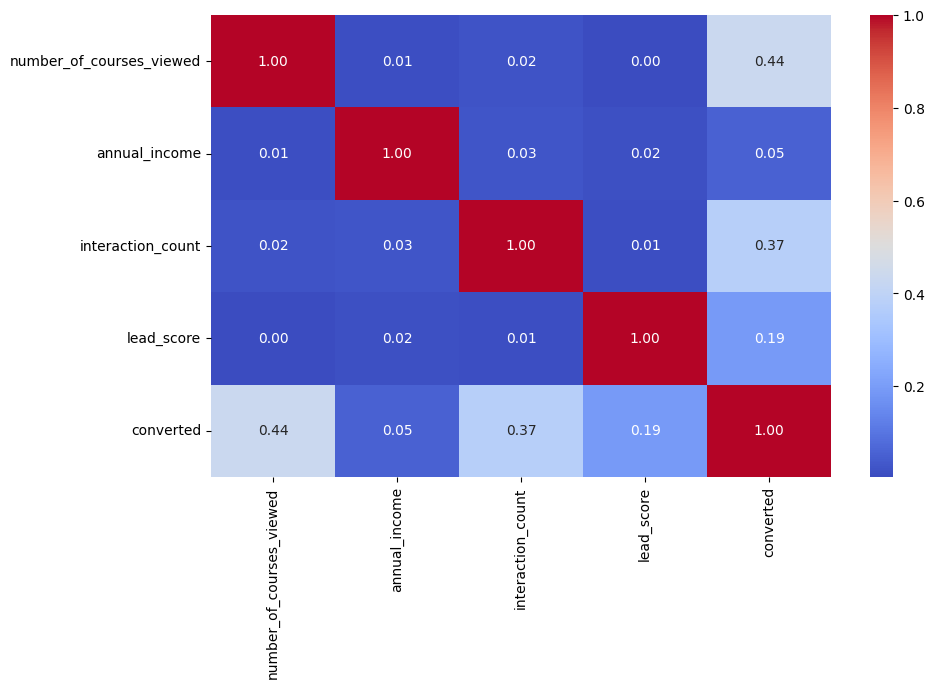

In [28]:
# heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

In [29]:
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
top_pair = sorted_pairs[sorted_pairs < 1.0].drop_duplicates().head(1)

In [31]:
corr_pairs

number_of_courses_viewed  number_of_courses_viewed    1.000000
                          annual_income               0.009770
                          interaction_count           0.023565
                          lead_score                  0.004879
                          converted                   0.435914
annual_income             number_of_courses_viewed    0.009770
                          annual_income               1.000000
                          interaction_count           0.027036
                          lead_score                  0.015610
                          converted                   0.053131
interaction_count         number_of_courses_viewed    0.023565
                          annual_income               0.027036
                          interaction_count           1.000000
                          lead_score                  0.009888
                          converted                   0.374573
lead_score                number_of_courses_viewed    0

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score

In [33]:
# splitting full train and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
# splitting train and validation sets
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [34]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [35]:
# reset indices and drop old indices
df_train = df_train.reset_index(drop=True)      
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
# get the y_train, y_val, y_test
y_train = df_train.converted.values 
y_val = df_val.converted.values
y_test = df_test.converted.values

In [37]:
# delete the target from the datasets
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [38]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,events,manufacturing,2,95543.0,unemployed,europe,3,0.78
1,referral,NA,1,54924.0,student,south_america,6,0.39
2,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22
3,paid_ads,other,2,34600.0,employed,south_america,2,0.31
4,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01


In [42]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,referral,NA,1,56659.0,employed,asia,4,0.75,1
1,social_media,education,2,66171.0,unemployed,north_america,2,0.66,0
2,events,finance,1,66523.0,self_employed,europe,3,0.64,1
3,social_media,finance,1,56746.0,student,north_america,3,0.98,0
4,referral,NA,0,55449.0,student,australia,4,0.47,0


In [43]:
df_full_train.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [45]:
df_full_train['converted'].value_counts(normalize=True) 

converted
1    0.611634
0    0.388366
Name: proportion, dtype: float64

In [47]:
df_full_train['converted'].mean()

np.float64(0.611633875106929)

In [48]:
df_full_train[cat_cols].nunique()

lead_source          6
industry             8
employment_status    5
location             8
dtype: int64

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`

In [46]:
# * Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
# * Round the scores to 2 decimals using `round(score, 2)`.
for col in cat_cols:
    score = mutual_info_score(df_train[col], y_train)
    print(f"{col}: {round(score, 4)}")

lead_source: 0.0248
industry: 0.0062
employment_status: 0.0163
location: 0.0015


In [51]:
from sklearn.metrics import mutual_info_score


In [52]:
# get mutual_info_score for lead_score vs. interaction_count
score = mutual_info_score(df_full_train['lead_score'], df_full_train['interaction_count'])
round(score, 4)

c:\Users\slate\OneDrive\Documents\0000000WGU_MSDA\ml-zoomcamp\machine-learning-zoomcamp\.venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


0.3455

In [53]:


# number_of_courses_viewed and lead_score

mutual_info_score(df_full_train['number_of_courses_viewed'], df_full_train['lead_score'])

c:\Users\slate\OneDrive\Documents\0000000WGU_MSDA\ml-zoomcamp\machine-learning-zoomcamp\.venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.2897023664659949

In [55]:
# number_of_courses_viewed and interaction_count
mutual_info_score(df_full_train['number_of_courses_viewed'], df_full_train['interaction_count'])

0.03328081168246138

In [56]:

# annual_income and interaction_count
mutual_info_score(df_full_train['annual_income'], df_full_train['interaction_count'])

c:\Users\slate\OneDrive\Documents\0000000WGU_MSDA\ml-zoomcamp\machine-learning-zoomcamp\.venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:49: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_label = type_of_target(labels_true)


1.6548546410589244

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [57]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)


In [58]:
train_dicts = df_train.to_dict(orient='records')
# dv = DictVectorizer(sparse=False)
val_dicts = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dicts)
X_val_encoded = dv.transform(val_dicts)

model.fit(X_train_encoded, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [59]:
# getting y_pred, and accuracy
y_pred = model.predict(X_val_encoded)
accuracy = accuracy_score(y_val, y_pred)    
accuracy

0.6996587030716723